In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
dfChina = pd.read_csv('SuicideChina.csv')

In [5]:
dfChina.head()

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [6]:
dfChina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


In [7]:
dfChina.describe()

,Unnamed: 0,Person_ID,Year,Month,Age
count,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000
mean,1286.000000,1286.000000,2010.045508,6.298327,52.630883
std,742.328095,742.328095,0.791412,3.202515,19.783878
min,1.000000,1.000000,2009.000000,1.000000,12.000000
25%,643.500000,643.500000,2009.000000,4.000000,37.000000
50%,1286.000000,1286.000000,2010.000000,6.000000,53.000000
75%,1928.500000,1928.500000,2011.000000,9.000000,69.000000
max,2571.000000,2571.000000,2011.000000,12.000000,100.000000


In [8]:
#Número de vítimas que foram hospitalizadas 
dfChina['Hospitalised'].value_counts()

yes    1553
no     1018
Name: Hospitalised, dtype: int64

In [9]:
#Número de vítimas que faleceram
dfChina['Died'].value_counts()

no     1315
yes    1256
Name: Died, dtype: int64

In [10]:
#Grau de educação das vítimas
dfChina['Education'].value_counts()

Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64

In [11]:
#As vítimas estavam em áreas urbanas?
dfChina['Urban'].value_counts()

no         2213
yes         277
unknown      81
Name: Urban, dtype: int64

In [12]:
#Sexo das vítimas
dfChina['Sex'].value_counts()

female    1328
male      1243
Name: Sex, dtype: int64

In [13]:
#Maior quantidade de suicídios por mês (junho)
dfChina['Month'].value_counts()

6     284
5     263
7     247
9     241
8     229
10    211
2     208
4     208
1     201
3     190
11    153
12    136
Name: Month, dtype: int64

In [14]:
#Trabalho que exerciam a maioria das vítimas 
dfChina['Occupation'].value_counts()

farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: Occupation, dtype: int64

In [15]:
#Qual foi o método da tentativa de suicídio?
dfChina['method'].value_counts()

Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64

In [16]:
#Média de idade por ano 
dfGroupedAge = dfChina.groupby('Year')['Age'].mean().round(0)
print(dfGroupedAge)

Year
2009    53.0
2010    53.0
2011    52.0
Name: Age, dtype: float64


In [17]:
#Média de maior indice em mês por ano 
dfGroupedDeit = dfChina.groupby('Year')['Month'].mean().round(0)
print(dfGroupedDeit)

Year
2009    6.0
2010    6.0
2011    6.0
Name: Month, dtype: float64


#VERIFICANDO A PRESENÇA DE VALORES AUSENTES

In [18]:
missingValues = dfChina['Hospitalised'].isnull().sum()
print(missingValues)

0


In [19]:
missingValues = dfChina['Year'].isnull().sum()
print(missingValues)

0


In [20]:
missingValues = dfChina['Month'].isnull().sum()
print(missingValues)

0


In [21]:
missingValues = dfChina['Urban'].isnull().sum()
print(missingValues)

0


In [22]:
missingValues = dfChina['Died'].isnull().sum()
print(missingValues)

0


Text(0.5, 1.0, 'Idade das Vitimas')

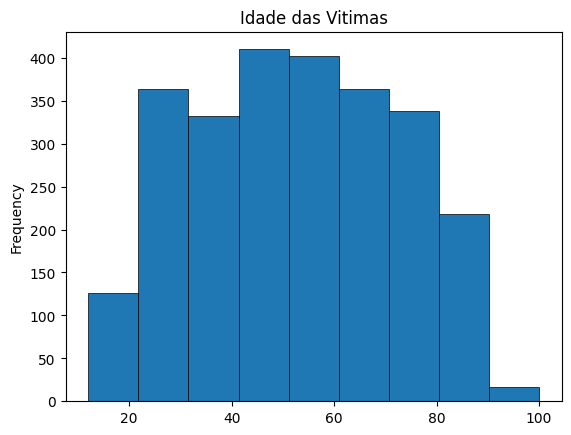

In [42]:
dfChina['Age'].plot(kind='hist', bins=9, edgecolor='black', linewidth=0.5)
plt.title('Idade das Vitimas')

Text(0.5, 1.0, 'Distribuição por Meses')

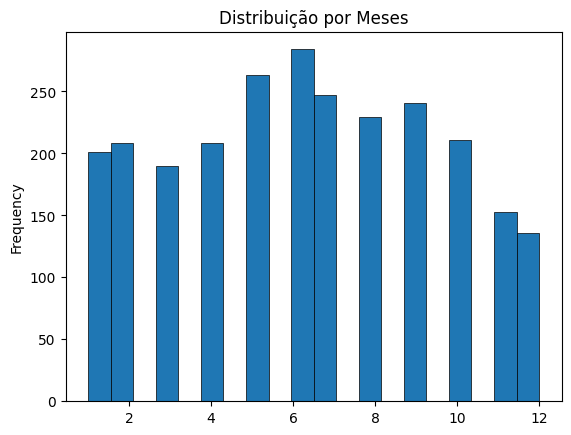

In [38]:
dfChina['Month'].plot(kind ='hist', bins= 20, edgecolor = 'black', linewidth = 0.5,)
plt.title('Distribuição por Meses')

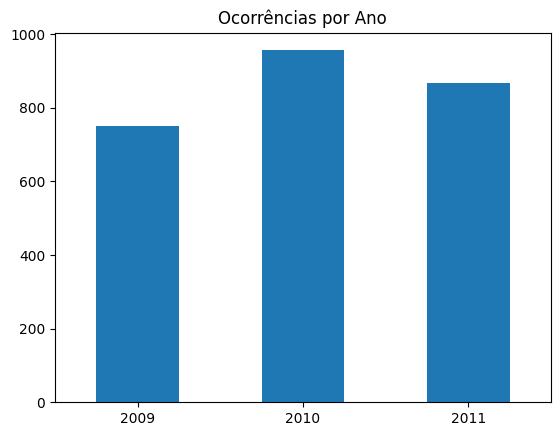

In [70]:
dfChina['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Ocorrências por Ano')
plt.xticks(rotation = 0)
plt.show()

Text(0.5, 1.0, 'Mortes por Sexo')

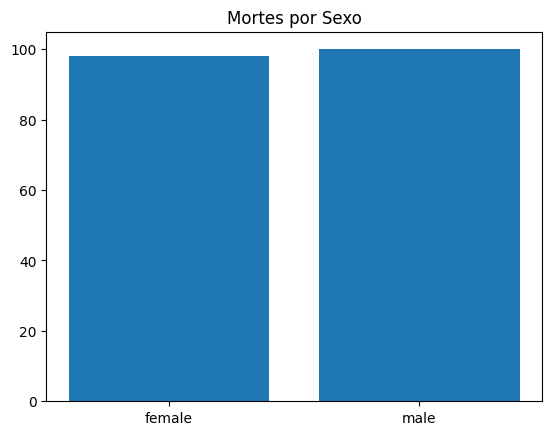

In [74]:
plt.bar(dfChina['Sex'], dfChina['Age']) 
plt.title('Mortes por Sexo')

In [80]:
#Filtrando os dados para o ano de 2009 
df2009 = dfChina[dfChina['Year'] == 2009]

#Obtendo os valores dos meses e do eixo y 
x = dfChina['Month']
y = df_2009['column_name']

#Criando o gráfico de linha 
plt.plot(x, y)

#Adicionando rótulos aos eixos
plt.xlabel('Mês')

plt.show()

NameError: ignored